# Kaggle Learn - Data Visualization

Working through lessons from https://www.kaggle.com/learn/data-visualisation

## Level 1, Part 8 - Multivariate plotting

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('default')

### Multivariate plotting

Using **visual variables:**
* Any visual cue that can be used to distinguish between two data elements
  + i.e. size, color, shape, and dimensional position
* Can be applied to augment any plot
* But should be applied in a way that keeps plots easily-interpretable
<br>

  **sns.lmplot** - for multivariate scatter plots
  * Function for plotting conditional subsets
  * sns.jointplot() is not intended for more than two dimensions
    + If you really want the marginal histograms, the sns.JointGrid class can be used to create them
<br>

  **sns.boxplot** or **sns.violin**
  * Seaborn's box and violin plots can take a **hue** argument to specify a categorical column to group into separate boxes or violins  
<br>

Using **summary variables:**
*  Creation of new variables by extracting and combining key information in existing variables.
*  i.e. correlation, dimensionality reduction 
<br> 

  **sns.heatmap**
  * Maps a feature describing pairs of variables
  * A correlation plot is a heat map for correlation between variables
<br>

  **pd.plotting.parallel_coordinates**
  * Line plots for sampled individuals grouped by category
  * Helps visualize how distinguishable the two groups are using the data from the plot 
<br> 
 
Using **summary variables:**
*  Creation of new variables by extracting and combining key information in existing variables.
<br> 

In [5]:
# Data and pre-processing for examples

pd.set_option('max_columns', None)
df = pd.read_csv("data/FifaCompleteDataset.csv", index_col=0)

import re
import numpy as np

footballers = df.copy()
footballers['Unit'] = df['Value'].str[-1]
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0, 
                                    footballers['Value'].str[1:-1]
                                    .replace(r'[a-zA-Z]',''))
footballers['Value (M)'] = footballers['Value (M)'].astype(float)
footballers['Value (M)'] = np.where(footballers['Unit'] == 'M', 
                                    footballers['Value (M)'], 
                                    footballers['Value (M)']/1000)
footballers = footballers.assign(Value=footballers['Value (M)'],
                                 Position=footballers['Preferred Positions'].str.split().str[0])

footballers.head()

/home/paul/Software/anaconda2/envs/ds36_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,M,95.5,ST
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,M,105.0,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,M,123.0,LW
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,M,97.0,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,61.0,GK


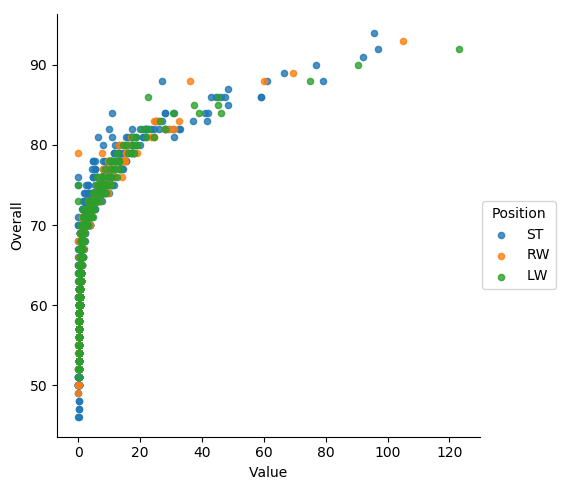

In [62]:
# Multivariate Scatter plot - Seaborn
sns.lmplot(x='Value', y='Overall', hue='Position', 
           data=footballers.loc[footballers['Position'].isin(['ST', 'RW', 'LW'])], 
           fit_reg=False, scatter_kws={"s": 20})
plt.show()

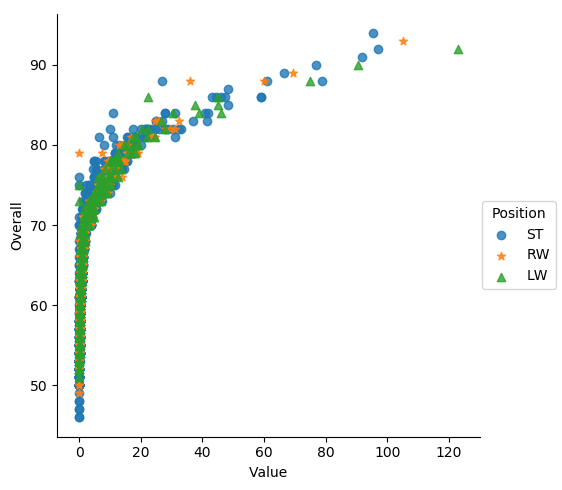

In [70]:
# Multivariate Scatter plot with markers - Seaborn
sns.lmplot(x='Value', y='Overall', markers=['o', '*', '^'], hue='Position',
           data=footballers.loc[footballers['Position'].isin(['ST', 'RW', 'LW'])],
           fit_reg=False
          )
plt.show()

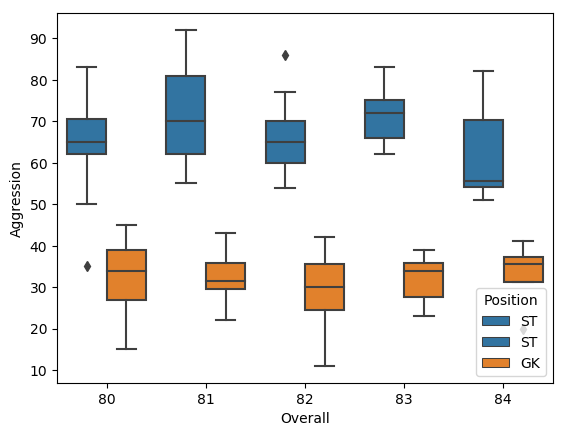

In [101]:
# Grouped box plot

# Processing for example
f = (footballers
         .loc[footballers['Position'].isin(['ST', 'GK'])]
         .loc[:, ['Value', 'Overall', 'Aggression', 'Position']]
    )
f = f[f["Overall"] >= 80]
f = f[f["Overall"] < 85]
f['Aggression'] = f['Aggression'].astype(float)

# plot
sns.boxplot(x="Overall", y="Aggression", hue='Position', data=f)

plt.show()

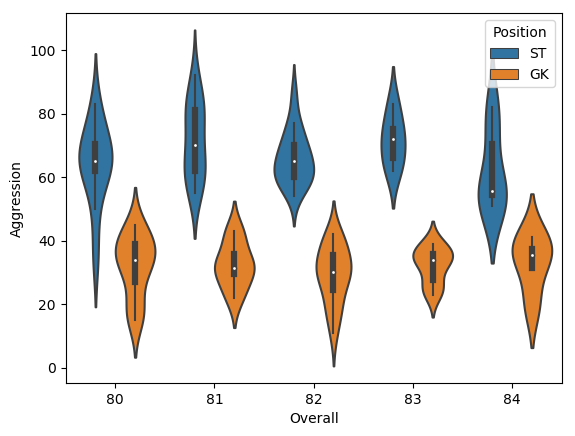

In [102]:
# Grouped violin plot

# Processing for example
f = (footballers
         .loc[footballers['Position'].isin(['ST', 'GK'])]
         .loc[:, ['Value', 'Overall', 'Aggression', 'Position']]
    )
f = f[f["Overall"] >= 80]
f = f[f["Overall"] < 85]
f['Aggression'] = f['Aggression'].astype(float)

# plot
sns.violinplot(x="Overall", y="Aggression", hue='Position', data=f)

plt.show()

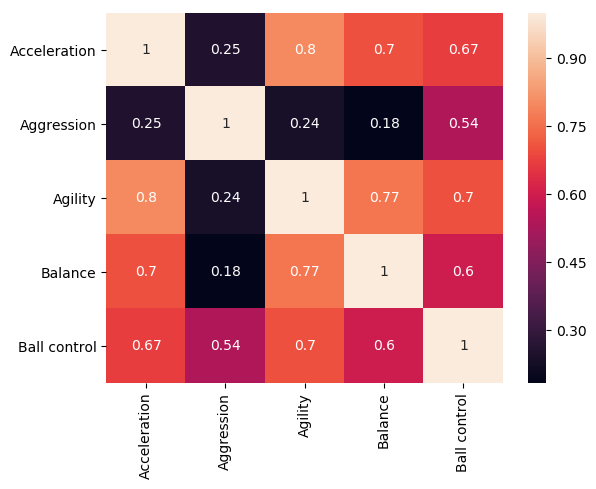

In [105]:
# Correlation plot
f = (footballers.loc[:, ['Acceleration', 'Aggression', 'Agility', 'Balance', 
                         'Ball control']]
                .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
                .dropna()
).corr()

sns.heatmap(f, annot=True)
plt.show()

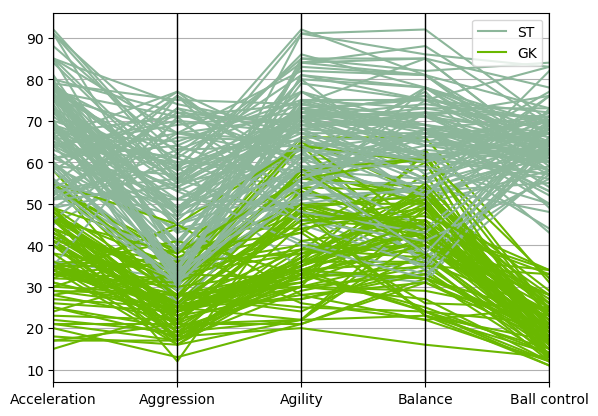

In [106]:
# Parallel coordinates
from pandas.plotting import parallel_coordinates

f = (
    footballers.iloc[:, 12:17]
        .loc[footballers['Position'].isin(['ST', 'GK'])]
        .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
        .dropna()
)
f['Position'] = footballers['Position']
f = f.sample(200)

parallel_coordinates(f, 'Position')
plt.show()

#### Exercises

In [107]:
pd.set_option('max_columns', None)
pokemon = pd.read_csv("data/pokemon.csv")
pokemon.head(3)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0


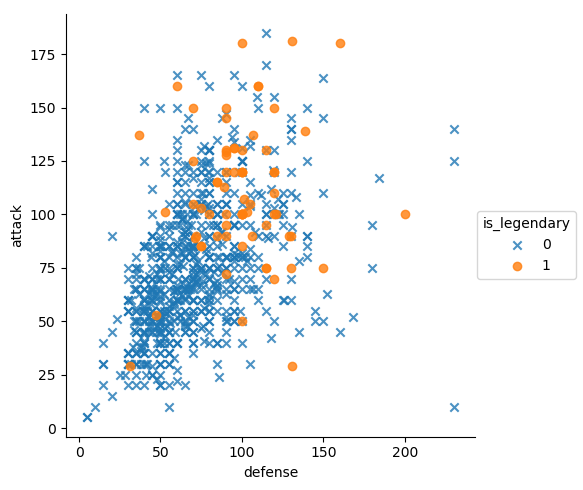

In [109]:
# Multivariate Scatter plot with markers - Seaborn
sns.lmplot(x='defense', y='attack', markers=['x', 'o'], hue='is_legendary',
           data=pokemon,
           fit_reg=False
          )
plt.show()
           #data=footballers.loc[footballers['Position'].isin([0, 1]),

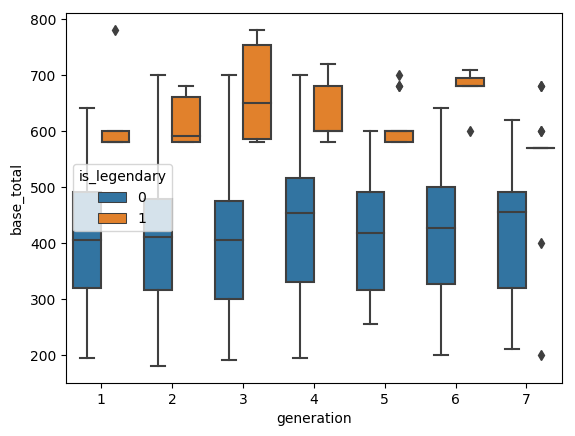

In [114]:
sns.boxplot(x='generation', y='base_total', hue='is_legendary', data=pokemon)

plt.show()

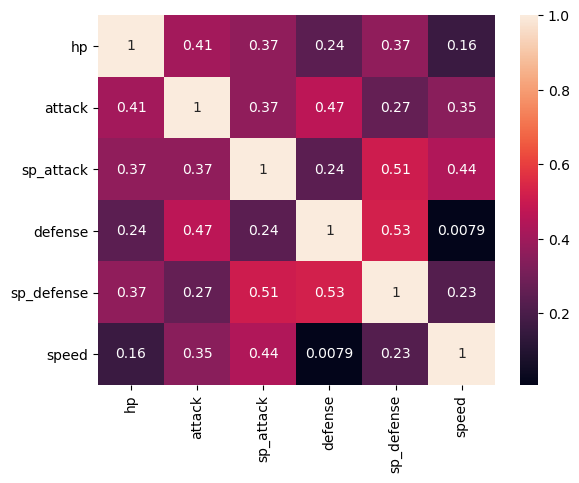

In [124]:
corr_df = (pokemon.loc[:, ['hp', 'attack', 'sp_attack', 'defense', 'sp_defense', 
                     'speed']]
).corr()

sns.heatmap(corr_df, annot=True)
plt.show()

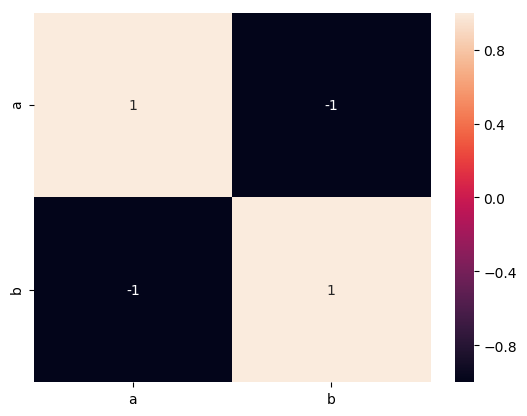

In [135]:
# Simple correlation test
f = pd.DataFrame({'a': [1,2,3,4],
                  'b': [4,3,2,1]})

sns.heatmap(f.corr(), annot=True)
plt.show()

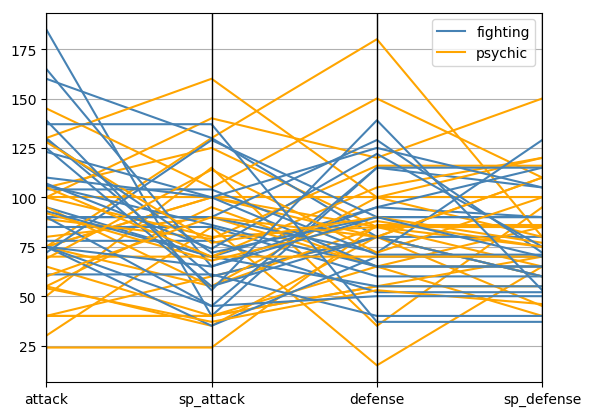

In [154]:
#f = (
#    footballers.iloc[:, 12:17]
#        .loc[footballers['Position'].isin(['ST', 'GK'])]
#        .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
#        .dropna()
#)
#f['Position'] = footballers['Position']
#f = f.sample(200)

parallel_coordinates(pokemon.loc[pokemon.type2.isin(['fighting', 'psychic'])]
                            .loc[:, ['attack', 'sp_attack', 'defense',
                                     'sp_defense', 'type2']],
                    'type2',
                    color=['steelblue', 'orange'])

#parallel_coordinates(f, 'type2')
plt.show()

In [140]:
pokemon.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [142]:
pokemon.type2

0        poison
1        poison
2        poison
3           NaN
4           NaN
5        flying
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11       flying
12       poison
13       poison
14       poison
15       flying
16       flying
17       flying
18         dark
19         dark
20       flying
21       flying
22          NaN
23          NaN
24          NaN
25     electric
26          ice
27          ice
28          NaN
29          NaN
         ...   
771         NaN
772         NaN
773      flying
774         NaN
775      dragon
776       steel
777       fairy
778     psychic
779      dragon
780       grass
781         NaN
782    fighting
783    fighting
784       fairy
785       fairy
786       fairy
787       fairy
788         NaN
789         NaN
790       steel
791       ghost
792      poison
793    fighting
794    fighting
795         NaN
796      flying
797       steel
798      dragon
799         NaN
800       fairy
Name: type2, Length: 801